<a href="https://colab.research.google.com/github/anu04596/CustomerSegmentation/blob/main/CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
data=pd.read_csv('/content/marketing_campaign.csv' ,sep='\t')


In [91]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [92]:
data.shape

(2240, 29)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Data Cleaning

In [94]:
#Handling null values
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [95]:
data['Income'].fillna(data['Income'].mean(),inplace=True)

In [96]:
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Handling duplicates

In [97]:
data.drop_duplicates(inplace=True)

Handling DateTime Column

In [98]:
from datetime import datetime
data['Dt_Customer']=pd.to_datetime(data['Dt_Customer'], dayfirst=True)

data['join_year']=data['Dt_Customer'].dt.year
data['join_month']=data['Dt_Customer'].dt.month
data['days_since_joining'] = (pd.to_datetime('today') - data['Dt_Customer']).dt.days

In [99]:
data.drop('Dt_Customer',axis=1,inplace=True)
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,join_year,join_month,days_since_joining
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,0,0,0,0,3,11,1,2012,9,4686
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,0,0,0,0,3,11,0,2014,3,4136
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,0,0,0,0,3,11,0,2013,8,4335
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,0,0,0,0,3,11,0,2014,2,4162
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,0,0,0,0,3,11,0,2014,1,4184


Label Encoding

In [100]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in data.columns:
  if data[col].dtype=='object':
    data[col]=le.fit_transform(data[col])

In [101]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,join_year,join_month,days_since_joining
0,5524,1957,2,4,58138.0,0,0,58,635,88,...,0,0,0,0,3,11,1,2012,9,4686
1,2174,1954,2,4,46344.0,1,1,38,11,1,...,0,0,0,0,3,11,0,2014,3,4136
2,4141,1965,2,5,71613.0,0,0,26,426,49,...,0,0,0,0,3,11,0,2013,8,4335
3,6182,1984,2,5,26646.0,1,0,26,11,4,...,0,0,0,0,3,11,0,2014,2,4162
4,5324,1981,4,3,58293.0,1,0,94,173,43,...,0,0,0,0,3,11,0,2014,1,4184


Data Standardization

In [102]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_columns = data.columns
data = pd.DataFrame(sc.fit_transform(data), columns=data_columns)

In [103]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,join_year,join_month,days_since_joining
0,-0.020999,-0.985345,-0.350141,0.251004,0.235327,-0.825218,-0.929894,0.307039,0.983781,1.551577,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,2.388846,-1.502225,0.726520,1.531185
1,-1.053058,-1.235733,-0.350141,0.251004,-0.235826,1.032559,0.906934,-0.383664,-0.870479,-0.636301,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,1.420036,-0.994691,-1.190545
2,-0.447070,-0.317643,-0.350141,1.180340,0.773633,-0.825218,-0.929894,-0.798086,0.362723,0.570804,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,-0.041094,0.439652,-0.205773
3,0.181716,1.268149,-0.350141,1.180340,-1.022732,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,1.420036,-1.281560,-1.061881
4,-0.082614,1.017761,1.428354,-0.678332,0.241519,1.032559,-0.929894,1.550305,-0.389085,0.419916,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,1.420036,-1.568428,-0.953012


PCA

In [104]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data)

PCA()

In [105]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

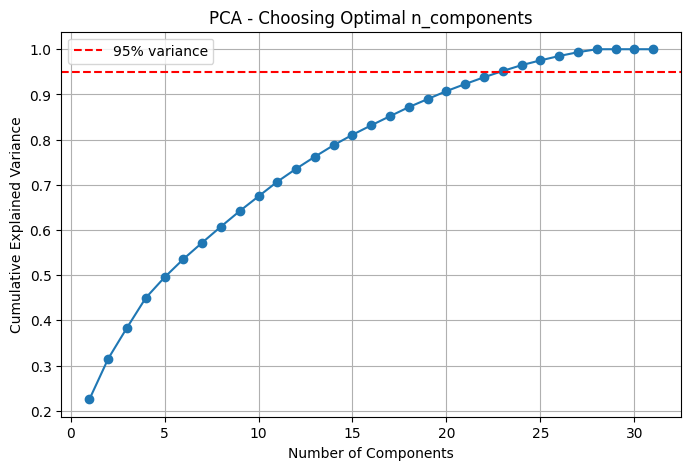

In [106]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Choosing Optimal n_components')
plt.legend()
plt.grid(True)
plt.show()

In [107]:
from sklearn.decomposition import PCA
import pandas as pd

#This will dynamically choose the minimum number of components required to retain 95% of information.
#pca = PCA(n_components=0.95)  # Retain 95% of variance
#data = pca.fit_transform(data)

pca = PCA(n_components=23)
data = pca.fit_transform(data)


K- Means Clustering

Finding value of 'K'

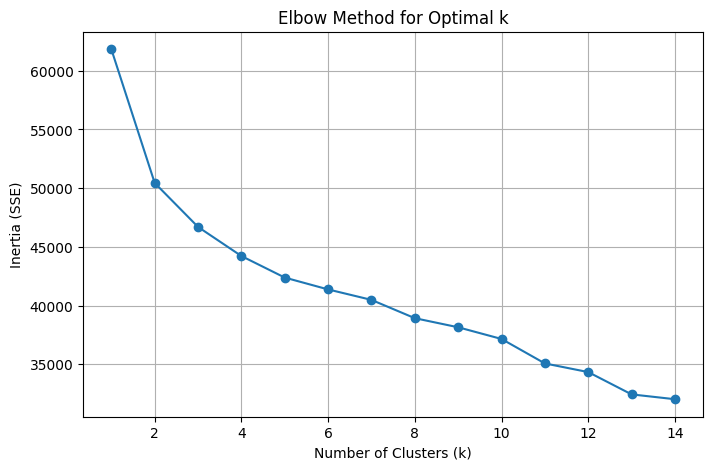

In [108]:
from sklearn.cluster import KMeans

inertia = []  # Sum of Squared Errors (SSE)
K_range = range(1, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)  # X_pca from PCA output
    inertia.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

For n_clusters=3

In [109]:
model=KMeans(n_clusters=3,random_state=42)
model.fit(data)

KMeans(n_clusters=3, random_state=42)

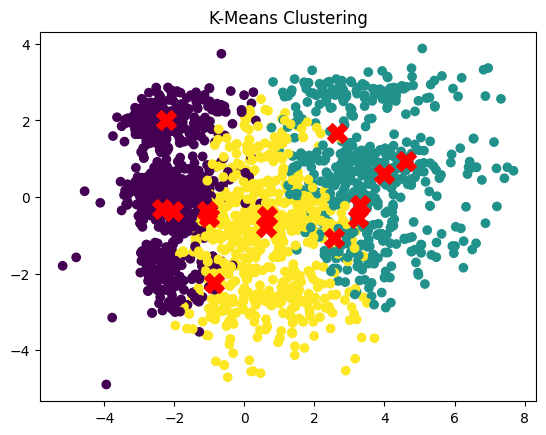

In [110]:
labels=model.predict(data)
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title("K-Means Clustering")
plt.show()

For n_clusters=4

In [111]:
model1=KMeans(n_clusters=4,random_state=42)
model1.fit(data)

KMeans(n_clusters=4, random_state=42)

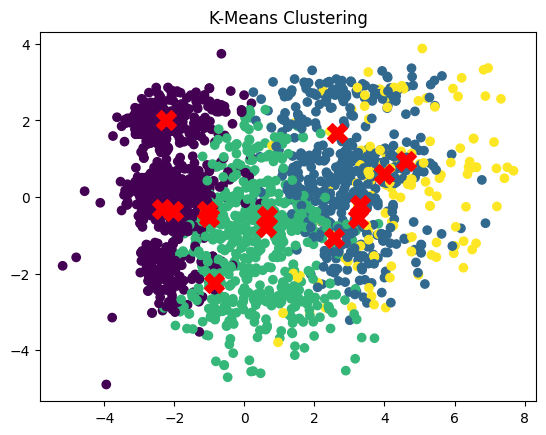

In [112]:
labels=model1.predict(data)
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title("K-Means Clustering")
plt.show()

Comparing Silhouette Score

In [113]:
from sklearn.metrics import silhouette_score
labels_3 = model.fit_predict(data)
score_3 = silhouette_score(data, labels_3)
print(f"Silhouette Score for k=3: {score_3:.4f}")

# For k = 4
labels_4 = model1.fit_predict(data)
score_4 = silhouette_score(data, labels_4)
print(f"Silhouette Score for k=4: {score_4:.4f}")

Silhouette Score for k=3: 0.1442
Silhouette Score for k=4: 0.1433


With best value of K(3)

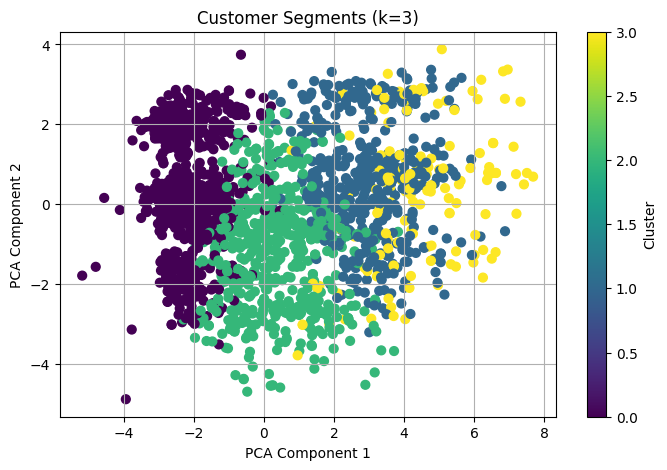

In [114]:
plt.figure(figsize=(8,5))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=40)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segments (k=3)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()